<a href="https://colab.research.google.com/github/MehrdadJalali-KIT/XPS_Spectrum/blob/main/XPS_Synthetic_WithPortions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Component Data:

Component                 | Binding energy (peak position, eV) | FWHM, eV
------------------------- | ----------------------------------- | --------
Silicon (Si)              | 99±0.1                              | 1.30±0.1
Silicon carbide (SiC)     | 100.4±0.5                           | 1.65±0.1
Silicon nitride (SiN)     | 101.6±0.3                           | 1.65±0.1
Silicon oxide (SiO2)      | 103.1±0.3                           | 1.65±0.1

Note: The values are provided with their respective uncertainties.



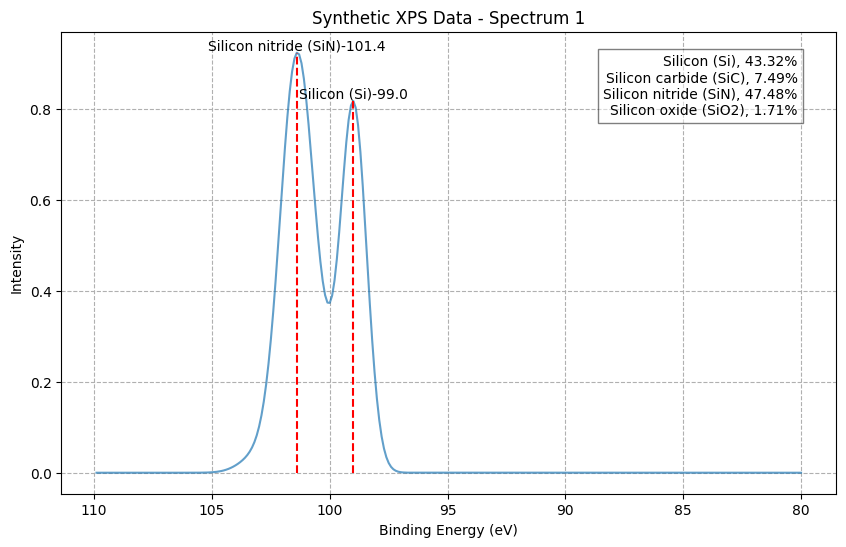

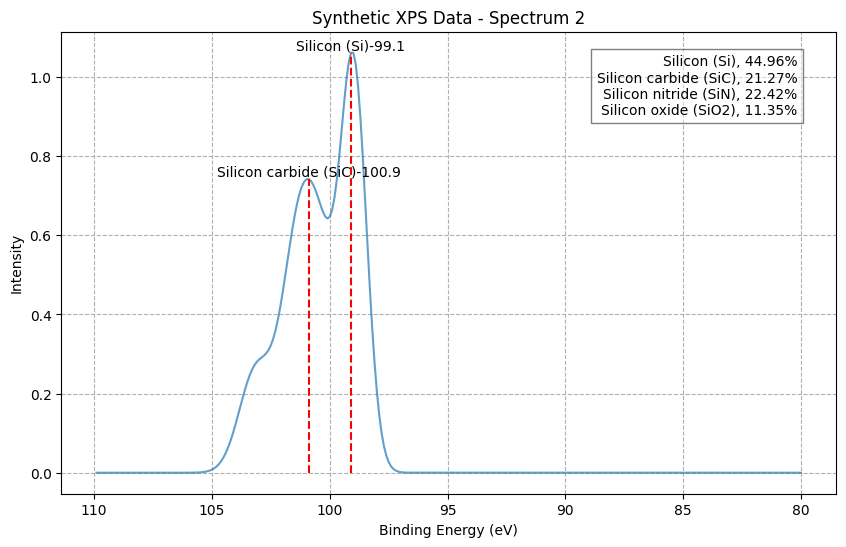

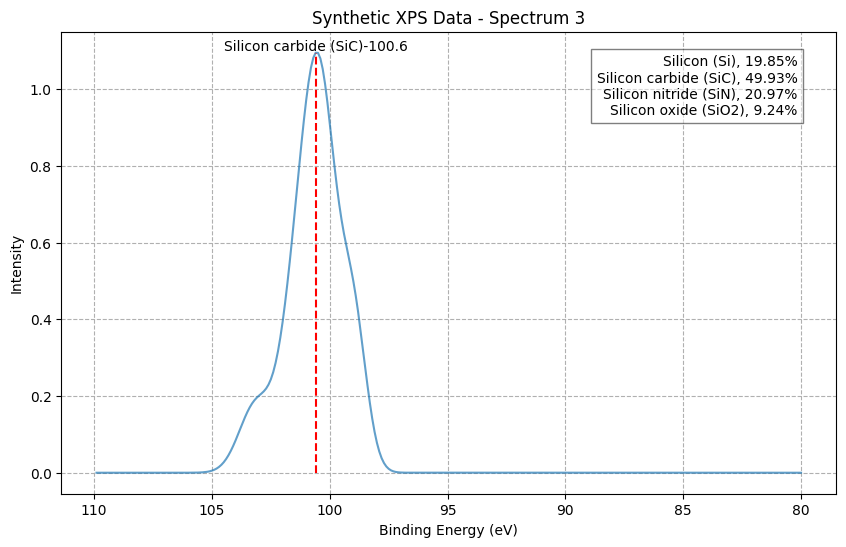

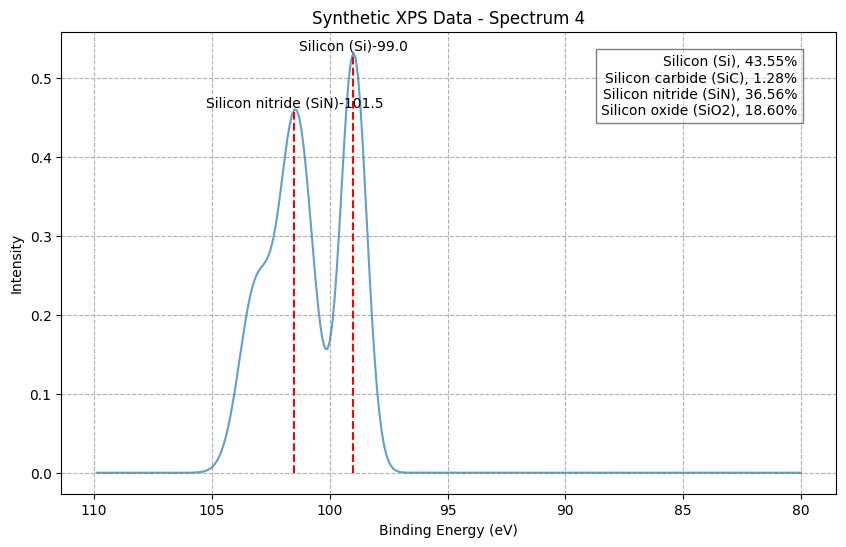

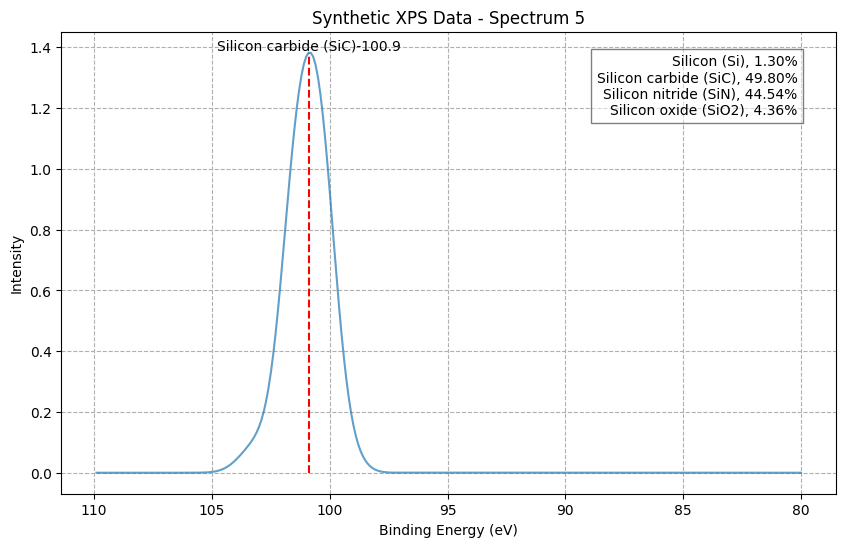

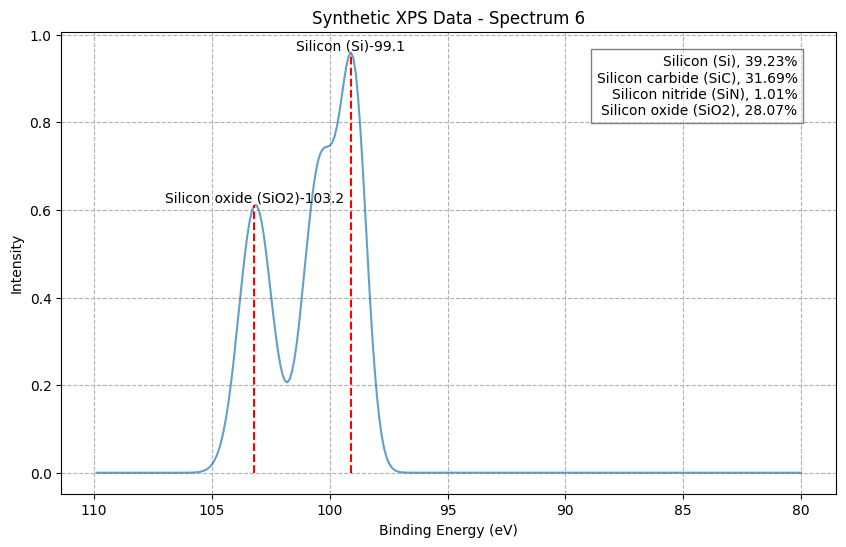

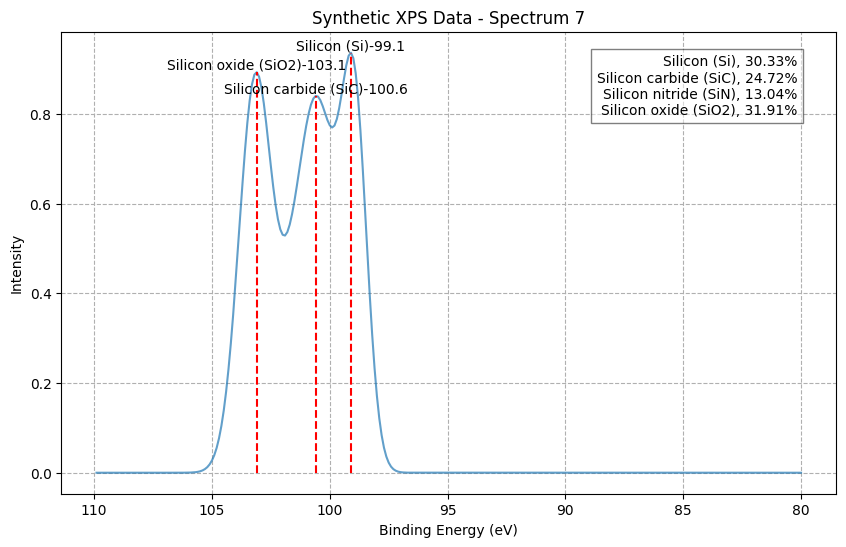

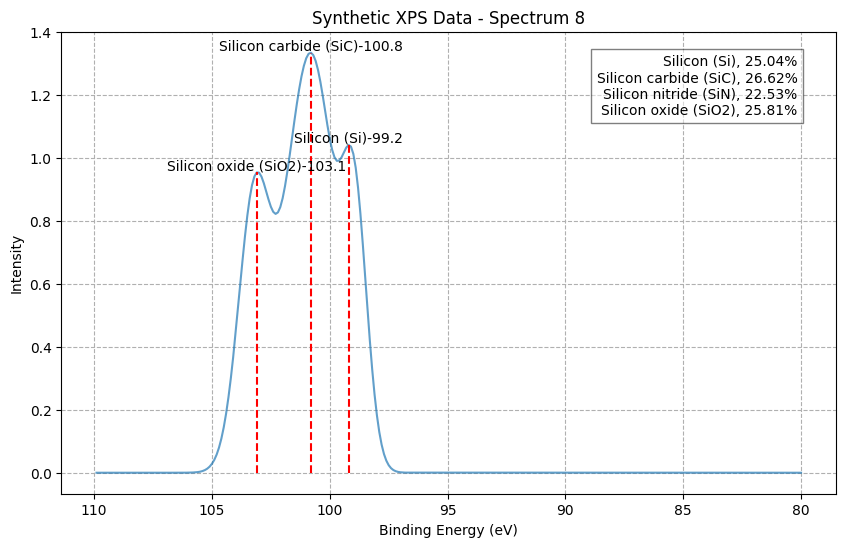

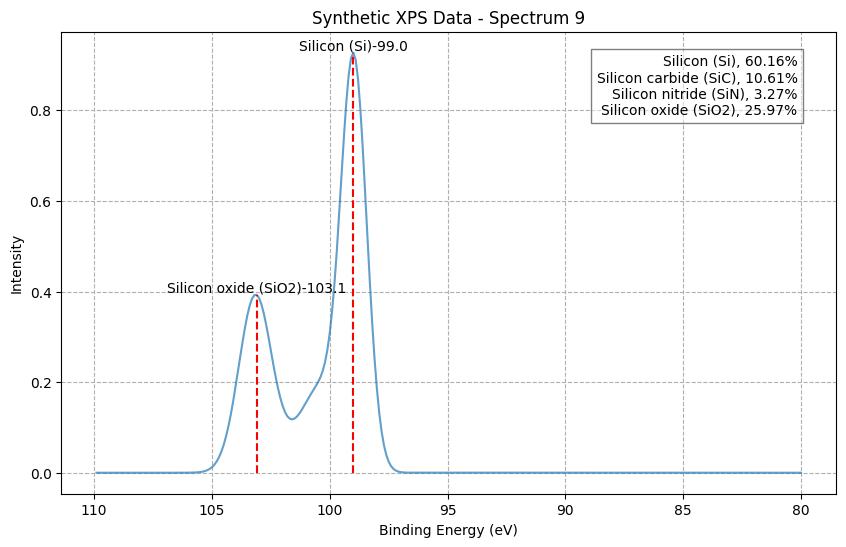

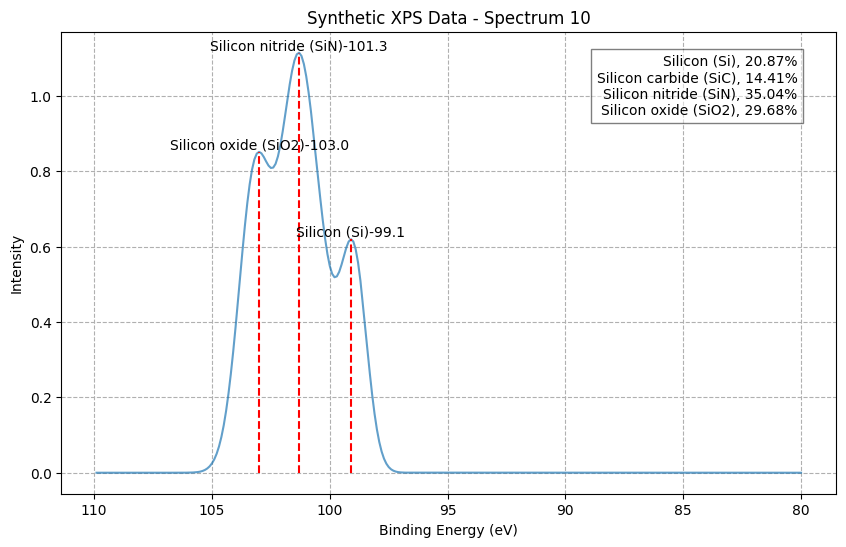

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Function to generate a spectrum as a sum of Gaussians
def generate_spectrum_sum_gaussians(amplitudes, centers, fwhms):
    x_range = np.arange(80, 110, 0.1)
    peaks = []
    for i in range(len(centers)):
        fwhm = fwhms[i]
        peak = amplitudes[i] * np.exp(-(x_range - centers[i])**2 / (2 * (fwhm / (2 * np.sqrt(2 * np.log(2)) ))**2))  # Gaussian peak with FWHM
        peaks.append(peak)
    return np.sum(peaks, axis=0)

# Adjusted specific frequencies with conditional random value additions
adjustedFrequencies = {
    99.0 + np.random.uniform(-0.1, 0.1): ('Silicon (Si)', 1.30),
    100.4 + np.random.uniform(-0.5, 0.5): ('Silicon carbide (SiC)', 1.65),
    101.6 + np.random.uniform(-0.3, 0.3): ('Silicon nitride (SiN)', 1.65),
    103.1 + np.random.uniform(-0.3, 0.3): ('Silicon oxide (SiO2)', 1.65)
}

# Generate amplitudes for spectra data
num_amplitudes = len(adjustedFrequencies)  # Adjusted number of amplitudes
num_spectra = 10  # Number of spectra

# Extract centers and FWHM values
centers = [center for center, _ in adjustedFrequencies.items()]
fwhms = [fwhm for _, (_, fwhm) in adjustedFrequencies.items()]

# Generate and plot 10 spectra
for i in range(num_spectra):
    # Generate spectra data with corresponding amplitude vectors
    amplitudes = np.random.rand(num_amplitudes)  # Random amplitudes for each spectrum
    spectrum = generate_spectrum_sum_gaussians(amplitudes, centers, fwhms)

    # Calculate the total amplitude for each label
    total_amplitude = {label: sum([amplitudes[i] for i, freq in enumerate(adjustedFrequencies.keys()) if adjustedFrequencies[freq][0] == label]) for label in ['Silicon (Si)', 'Silicon carbide (SiC)', 'Silicon nitride (SiN)', 'Silicon oxide (SiO2)']}

    # Calculate the percentage of each label
    total_spectrum_amplitude = sum(amplitudes)
    percentage_label = {label: (total_amplitude[label] / total_spectrum_amplitude) * 100 for label in total_amplitude}

    # Plot synthetic spectra data
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(80, 110, 0.1), spectrum, alpha=0.7)

    # Find peaks in the spectrum
    peaks, _ = find_peaks(spectrum, height=0)

    # Plot peaks
    plt.vlines(x=np.arange(80, 110, 0.1)[peaks], ymin=0, ymax=spectrum[peaks], color='r', linestyle='--')

    # Annotate peaks with labels
    for peak, binding_energy in zip(peaks, np.arange(80, 110, 0.1)[peaks]):
        closest_frequency = min(adjustedFrequencies, key=lambda x: abs(x - np.arange(80, 110, 0.1)[peak]))
        label, _ = adjustedFrequencies[closest_frequency]
        plt.text(binding_energy, spectrum[peak], f"{label}-{binding_energy:.1f}", rotation=0, va='bottom', ha='center')

   # Create a text box to display specific frequencies and their corresponding percentages
    text_box_content = '\n'.join([f"{label}, {percentage:.2f}%" for label, percentage in percentage_label.items()])
    plt.text(0.95, 0.95, text_box_content, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))


    plt.xlabel('Binding Energy (eV)')
    plt.ylabel('Intensity')
    plt.title(f'Synthetic XPS Data - Spectrum {i+1}')
    plt.grid(True, which="both", ls="--")
    plt.gca().invert_xaxis()  # Invert the x-axis
    plt.show()


